# How to calibrate your neural network classifer:
## Getting accurate probabilities from your neural network model

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nplan-io/kdd2020-calibration/blob/master/tutorial/KDD%202020%20-%20nPlan%20calibration%20session.ipynb)

## 1. Introduction

In this tutorial we'll use the CIFAR-10 image dataset, and a classifier trained on it, to explore what model confidence calibration is, how we can measure it, and what methods we can put in place to rectify poorly calibrated models.

In [1]:
# import relevant modules
from urllib.request import urlopen
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
import tensorflow.keras.utils
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score, log_loss
%matplotlib inline

/home/dan/venvs/venv1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dan/venvs/venv1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dan/venvs/venv1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dan/venvs/venv1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

In [23]:
# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#### CIFAR-10
CIFAR-10 is a dataset containing a collection of images falling into 10 classes: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. It contains 60 000 low resolution (32x32) images and is often used to train ML and computer vision models. The low resolution allows for quick testing of different models.

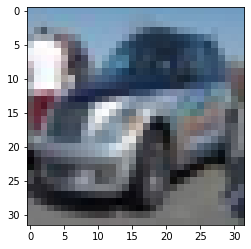

In [3]:
plt.imshow(x_train[112,])
plt.show()

First we need to do some preprocessing of the data. This will allow our model to achieve higher accuracy.

In [26]:
# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# If subtract pixel mean from each image
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean

y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

#### The model
Next step would be training the model but as we have limited time and resources, we will be using pre-trained [Keras ResNet model](https://keras.io/examples/cifar10_resnet/).

In [5]:
# model = Model(<some layers>)
# ...
# model.fit(x_train, y_train)
# ...
# model.evaluate(x_test,y_test)
#

In [6]:
# download, load and predict using the pretrained model
h5file = tensorflow.keras.utils.get_file('/tmp/KDD_model_1.h5',
         'https://raw.githubusercontent.com/nplan-io/kdd2020-calibration/master/tutorial/cifar10_resnet.h5')
model = load_model(h5file)
y_pred = model.predict(x_test)

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`


In [7]:
acc_score = accuracy_score(np.argmax(y_test,1),np.argmax(y_pred,1))
loss_score = log_loss(y_test, y_pred)
print('Test accuracy is {0:.2f}, test loss is {1:.2f}'.format(acc_score, loss_score))

Test accuracy is 0.91, test loss is 0.32


## 2. Understanding and measuring calibration - binary problems

Suppose we consider our model as a binary classifier for illustration: either an image is in class 0 (airplanes), or it isn't. We can simplify our labels and predictions as follows:

In [8]:
# Labels:
y_test_0 = [1 if y_val==0 else 0 for y_val in np.argmax(y_test, axis=1)]

# probabilities
y_prob_pred_0 = y_pred[:,0]
# Predictions:
y_pred_0 = [0 if y_pred_val<1 else 1 for y_pred_val in y_pred[:,0]]

acc_score_0 = accuracy_score(y_test_0,y_pred_0)
loss_score_0 = log_loss(y_test_0, y_prob_pred_0)
print('Test accuracy is {0:.2f}, test loss is {1:.2f}'.format(acc_score_0, loss_score_0))

Test accuracy is 0.91, test loss is nan


/home/dan/venvs/venv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:2174: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/home/dan/venvs/venv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:2174: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


### 2.1 Reliability diagrams
Can you use `calibration_curve()` from scikit-learn to show how calibrated the model is on our data? How would you interpret the results?

In [9]:
### YOUR CODE HERE


### 2.2 Expected calibration error
Given the explanation of ECE, can you calculate the error for our dataset?

In [10]:
# complete this function to calculate ece
def ece_calculation_binary(prob_true, prob_pred, bin_sizes):
    ### YOUR CODE HERE 

# print the calculated ece
pred_hist_0 = np.histogram(a=y_pred_0, range=(0, 1), bins=n_bins_0)[0]     
print(ece_calculation_binary(prob_true, prob_pred, pred_hist_0))

### 2.3 Maximum calibration error
Given the explanation of MCE, can you calculate it for our model?

In [11]:
# complete this function to calculate mce
def mce_calculation_binary(prob_true, prob_pred):
    ### YOUR CODE HERE 

#print the calculated mce
print(mce_calculation_binary(prob_true, prob_pred))

### 2.4 Root mean square calibration error
Given the explanation, can you calculate RMSCE for our data?

In [12]:
# complete this function to calculate rmsce
def rmsce_calculation_binary(prob_true, prob_pred, bin_sizes):
    ### YOUR CODE HERE 

# print the calculated rmsce
print(rmcse_calculation_binary(prob_true, prob_pred, pred_hist_0))

## 3. Multiclass problems
Extending the definition of these metrics, we can use them for multiclass classifiers, too. Can you show the reliability diagrams and calculate the calibration errors for the 10 classes?

In [13]:
### YOUR CODE HERE


def ece_calculation_multiclass():
    ### use calibration_curve and your binary function to complete this function
    
def mce_calculation_multiclass():
    ### use calibration_curve and your binary function to complete this function
    
def rmsce_calculation_multiclass():
    ### use calibration_curve and your binary function to complete this function

## 4. Post-training calibration methods - binary problems
One way to mitigate a poorly calibrated model is through a post-hoc calibration method. In general, we seek a function to translate some output of our model into a calibrated probability. These come in several flavours - first we look at the binary problem, as before.

### 4.1 Non-parametric methods (Isotonic regression)
Given the description of isotonic regression, can you fit a stepwise constant, monotonically increasing function to the bucketed softmax data? Again, scikit-learn may be useful. Plot your result on the reliability diagram.

In [14]:
## YOUR CODE HERE


### 4.2 Platt scaling
Now, based on the explanation, can you implement binary platt scaling for our binary classifier? How did it improve the calibration? 

In [15]:
### YOUR CODE HERE 


## 5 Calibrating multiclass models

Extending to the multiclass case is not simple. Several methods have been suggested, which include treating each class as a one-vs-all binary problem, calibrating it, and then normalising the new calibrated values across classes. Another idea is to generalise Platt Scaling from a one dimensional linear optimisation problem - we will discuss this below.

### 5.1 Keras example -  temperature scaling
A very simple generalisation of Platt scaling is to tune a single parameter based on the logits of the network, in order to try to optimise NLL - this is temperature scaling.

First we need to define a Keras layer that does the transformation we want:

In [1]:
import tensorflow as tf
class TemperatureLayer(tensorflow.keras.layers.Layer):
    """
    A keras layer that divides the input tensor elementwise by a single trainable parameter
    temp_weight
    """
    def __init__(self, **kwargs):
        """
        Initialises layer with weight param
        """
        self.temp_weight = None
        super(TemperatureLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        """
        Defines the trainable parameters of the model
        """
        self.temp_weight = self.add_weight(
            name="temp",
            shape=(1,),
            initializer='one'
        )
        super(TemperatureLayer, self).build(input_shape)
        
    def call(self, in_tensor):
        """
        Divide input tensor by constant t
        """
        return tf.divide(in_tensor, self.temp_weight)

/home/dan/venvs/venv1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dan/venvs/venv1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dan/venvs/venv1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dan/venvs/venv1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

NameError: name 'tensorflow' is not defined

Now we can take our trained model and insert the temperature layer prior to the softmax output:

In [17]:
new_model = model
# remove the original softmax
new_model.layers.pop()
# pipe the intermediate output through our new layer
output = new_model.layers[-1].output
output = TemperatureLayer(name="calibration", trainable=False)(output)
# add the softmax again
output = tf.keras.layers.Activation('softmax', name='new_softmax')(output)
# rebuild the model
new_model = tf.keras.Model(inputs=new_model.input, outputs=output)

In [28]:
# we can see when we  that we've inserted the layer into the model
new_model.layers[-5:]

Now we need to fix our pretrained weights, allow the calibration weights to be trained, and recompile the model:

In [3]:
for layer in new_model.layers:
    if "calibration" in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

new_model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

NameError: name 'new_model' is not defined

We can now train the model using Keras `model.fit` - and only our calibration layer weights will be trained!

In [29]:
new_model.fit(x_test,y_test)

10000/10000 [==============================] - 7s 721us/sample - loss: 0.9021 - acc: 0.9127


In [4]:
# plot the reliability diagrams and use your metric calculators to calculate the calibration metrics for this new model
# have they improved?


### 4.2 Implementing a scaling layer
Now it's your turn. Implement and evaluate a calibration method on the multiclass classifier. Based on the explanations you can use either matrix or vector platt layer. 

In [30]:
### Complete this class to encapsulate the vector or matrix scaling logic as explained in the presentation

# (hint - keras.layers.Dense may help for matrix platt!)
class MyCalLayer(tf.keras.layers.Layer):
    """ A template keras layer """
    
    def __init__(self, **kwargs):
        """ Initialises layer with weight params """
        ###
        # initialise weight variables here
        ###
        super(MyCalLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        """ Defines the trainable parameters of the model """
        ###
        # add keras weight objs of the correct shape to
        # the respective varibles here
        ###
        super(MyCalLayer, self).build(input_shape)
        
    def call(self, in_tensor):
        """ undertakes layer transformation """
        ###
        # use the relevant tf functions to manipulate 
        # tensors as required, and return result
        ###
        return None

In [ ]:
# follow the steps of the temperature scaling example above to calibrate and evaluate your model